In [1]:
import os
os.environ['R_HOME'] = r'C:\Program Files\R\R-4.3.1'

import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr, data
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from matplotlib import rc, rcParams
import matplotlib.dates as mdates

In [2]:
base = importr('base')
rict = importr('rict')

In [3]:
pd_df = pd.read_csv('new-input-file-data-to-use-multi-year-1.txt')
with localconverter(ro.default_converter + pandas2ri.converter):
  r_from_pd_df = ro.conversion.py2rpy(pd_df)

In [4]:
r_result = rict.rict(r_from_pd_df, year_type="multi", store_eqrs=True, seed=True)

R[write to console]: Variables for the 'physical' model detected - applying relevant checks. 

R[write to console]: Grid reference values detected for 'GB' - applying relevant checks.

R[write to console]: Success, all validation checks passed!

R[write to console]: Classifying...



In [5]:
with localconverter(ro.default_converter + pandas2ri.converter):
  result = ro.conversion.rpy2py(r_result)

result

,ID,SITE,YEAR,EQR,EQR Metrics
1,1,MYR-GB-01-R,2016,0.945434,AVG_ASPT
2,1,MYR-GB-01-R,2016,0.972966,AVG_ASPT
3,1,MYR-GB-01-R,2016,0.982756,AVG_ASPT
4,1,MYR-GB-01-R,2016,0.944572,AVG_ASPT
5,1,MYR-GB-01-R,2016,0.936237,AVG_ASPT
...,...,...,...,...,...
300026,10,MYR-GB-12-D,2016,5.000000,MINTA
300027,10,MYR-GB-12-D,2016,5.000000,MINTA
300028,10,MYR-GB-12-D,2016,NaN,ALL_SEASONS_ASPT
300029,10,MYR-GB-12-D,2016,NaN,ALL_SEASONS_NTAXA


In [6]:
print(result['SITE'])

1         MYR-GB-01-R
2         MYR-GB-01-R
3         MYR-GB-01-R
4         MYR-GB-01-R
5         MYR-GB-01-R
             ...     
300026    MYR-GB-12-D
300027    MYR-GB-12-D
300028    MYR-GB-12-D
300029    MYR-GB-12-D
300030    MYR-GB-12-D
Name: SITE, Length: 300030, dtype: object


In [7]:
site_1 = result[result['SITE'].str.contains('MYR-GB-01-R')]

In [8]:
site_avg_aspt = site_1[site_1['EQR Metrics'].str.contains('AVG_ASPT')]

In [9]:
site_avg_aspt

,ID,SITE,YEAR,EQR,EQR Metrics
1,1,MYR-GB-01-R,2016,0.945434,AVG_ASPT
2,1,MYR-GB-01-R,2016,0.972966,AVG_ASPT
3,1,MYR-GB-01-R,2016,0.982756,AVG_ASPT
4,1,MYR-GB-01-R,2016,0.944572,AVG_ASPT
5,1,MYR-GB-01-R,2016,0.936237,AVG_ASPT
...,...,...,...,...,...
9996,1,MYR-GB-01-R,2016,0.939957,AVG_ASPT
9997,1,MYR-GB-01-R,2016,0.946853,AVG_ASPT
9998,1,MYR-GB-01-R,2016,0.934045,AVG_ASPT
9999,1,MYR-GB-01-R,2016,0.959630,AVG_ASPT


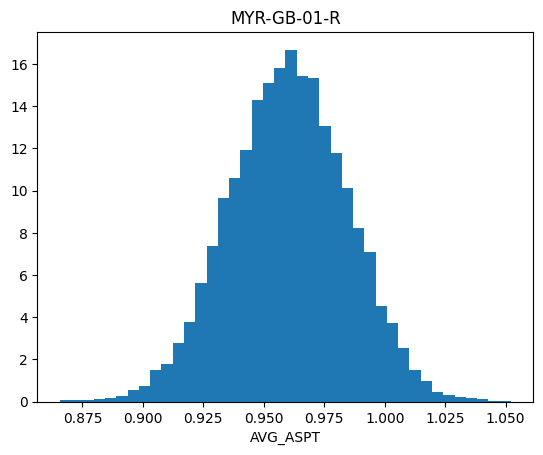

In [10]:
plt.hist(site_avg_aspt['EQR'], density=True, bins=40)
plt.title("MYR-GB-01-R")
plt.xlabel("AVG_ASPT")

plt.show()

In [11]:
sites = ["MYR-GB-01-R", "MYR-GB-05-R", "MYR-GB-07-R", "MYR-GB-09-R", "MYR-GB-12-R", "MYR-GB-01-D", "MYR-GB-05-D", "MYR-GB-07-D", "MYR-GB-09-D", "MYR-GB-12-D"]

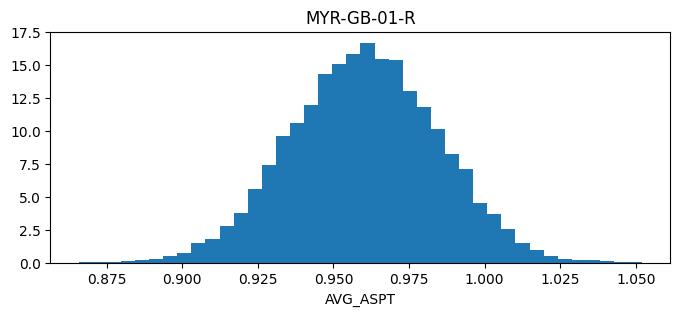

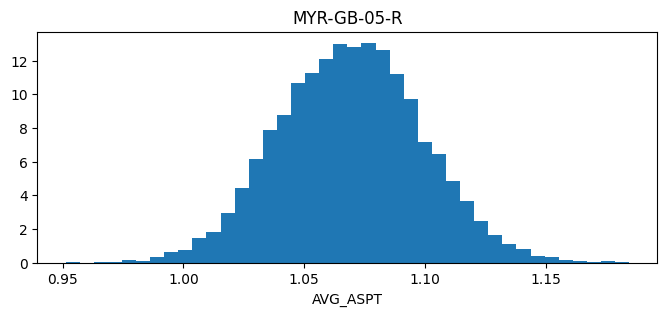

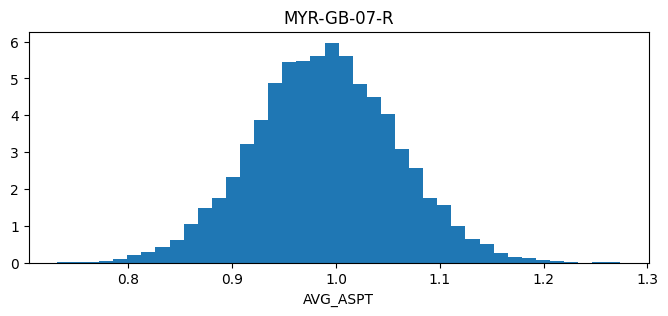

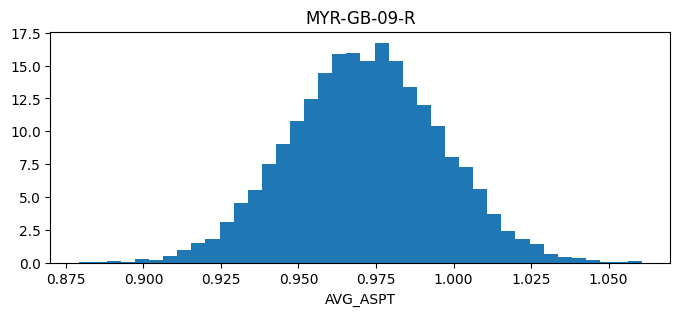

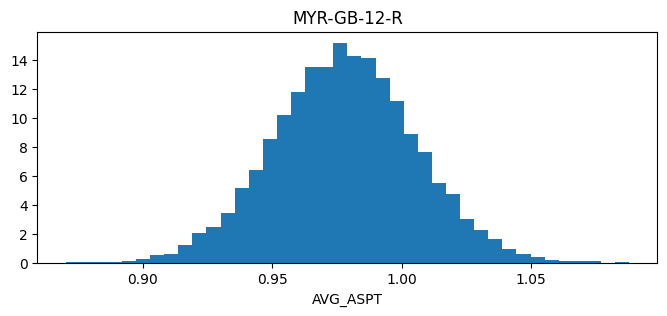

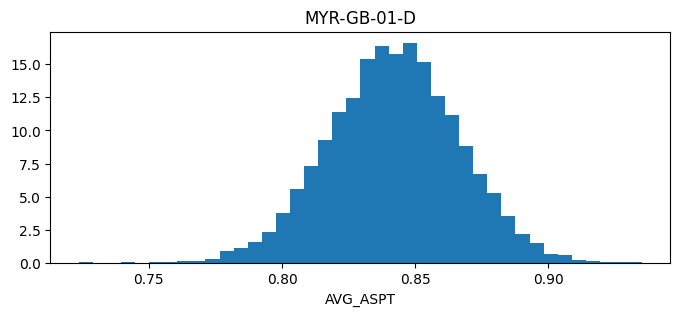

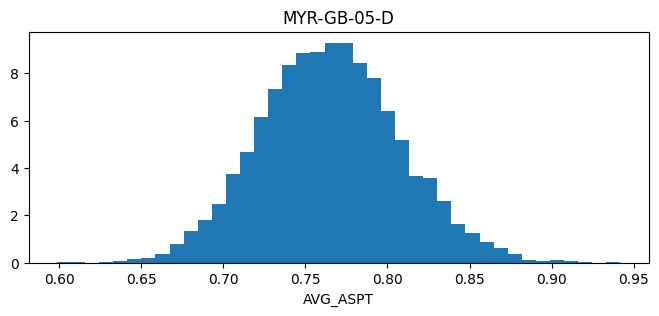

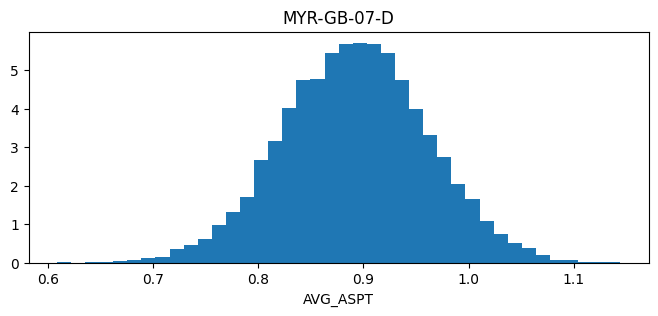

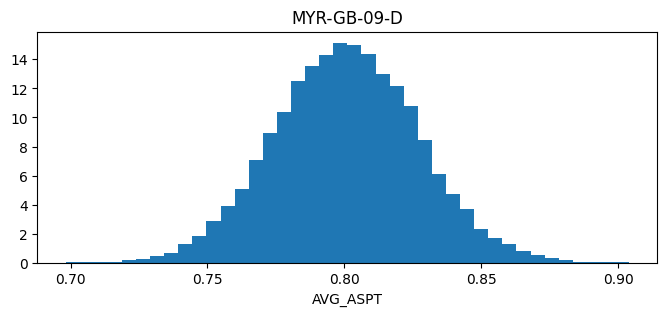

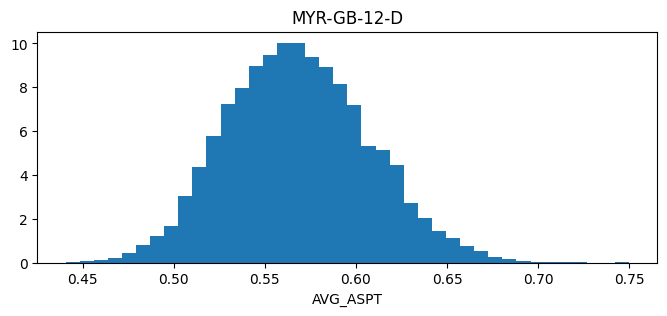

In [12]:

for site in sites:
    site_results = result[result['SITE'].str.contains(site)]
    site_avg_aspt = site_results[site_results['EQR Metrics'].str.contains('AVG_ASPT')]

    fig, ax = plt.subplots(1, figsize=(8,3))
    ax.hist(site_avg_aspt['EQR'], density=True, bins=40)
    ax.set_title(site)
    ax.set_xlabel("AVG_ASPT")
    plt.show()